In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tit_data=pd.read_csv("C:/AiAnalyticsHub/titanic3.csv")

In [2]:
tit_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Getting missing value rows of particular colomn :

missing = np.where(tit_data["age"].isnull() == True)
print("Total Count of missing values for Age colomn :",len(missing[0]))
print(missing)

Total Count of missing values for Age colomn : 264
(array([  15,   37,   40,   46,   59,   69,   70,   74,   80,  106,  107,
        108,  118,  121,  125,  134,  147,  152,  157,  166,  176,  179,
        184,  196,  204,  219,  223,  235,  237,  241,  254,  256,  269,
        277,  283,  293,  297,  318,  320,  363,  382,  384,  410,  469,
        473,  477,  483,  491,  495,  524,  528,  531,  581,  595,  597,
        672,  680,  681,  682,  705,  706,  756,  757,  767,  768,  775,
        789,  795,  798,  800,  801,  802,  804,  805,  808,  812,  813,
        815,  816,  819,  835,  842,  843,  852,  854,  856,  858,  865,
        871,  872,  874,  876,  879,  882,  886,  887,  900,  901,  902,
        903,  918,  920,  921,  922,  923,  926,  927,  928,  929,  930,
        931,  940,  942,  944,  945,  946,  948,  954,  955,  956,  957,
        958,  961,  962,  971,  973,  976,  982,  983,  984,  987,  988,
        989,  991,  993,  994,  997,  998,  999, 1000, 1001, 1002, 1003,

In [4]:
tit=tit_data[['pclass','age','sex','embarked','survived','fare']]

In [5]:
tit.isnull().sum()

pclass        1
age         264
sex           1
embarked      3
survived      1
fare          2
dtype: int64

In [6]:
# There are total 264 rows are NULL for age coloumn: So either we can remove those rows are we can fill with median value.
# train_data['age'] = train_data['age'].fillna(train_data['age'].median())
# But i am storing only valid data to train_data and i will test it first

train_data=tit.dropna()

In [7]:
## Create function to replace NaN with the median value for each ticket class
def fill_missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Pclass"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset

In [8]:
train_data.isnull().sum()

pclass      0
age         0
sex         0
embarked    0
survived    0
fare        0
dtype: int64

In [9]:
train_data.isnull().any()

pclass      False
age         False
sex         False
embarked    False
survived    False
fare        False
dtype: bool

In [10]:
train_data.head(5)

,pclass,age,sex,embarked,survived,fare
0,1.0,29.0000,female,S,1.0,211.3375
1,1.0,0.9167,male,S,1.0,151.5500
2,1.0,2.0000,female,S,0.0,151.5500
3,1.0,30.0000,male,S,0.0,151.5500
4,1.0,25.0000,female,S,0.0,151.5500


In [11]:
train_data['pclass'].value_counts()

3.0    500
1.0    282
2.0    261
Name: pclass, dtype: int64

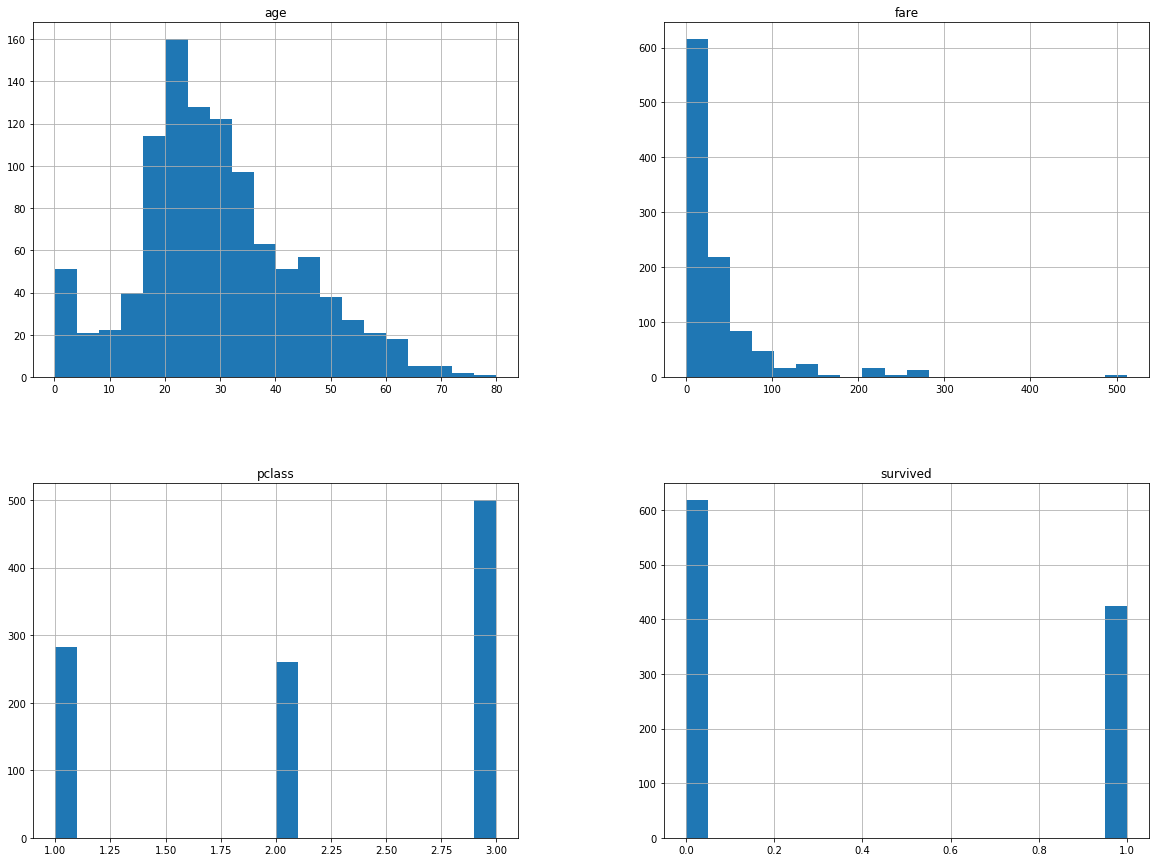

In [21]:
%matplotlib inline
train_data.hist(figsize=(20,15), bins=20)
plt.show()

In [10]:
train_data[['survived']].groupby('survived').survived.count()

survived
0.0    618
1.0    425
Name: survived, dtype: int64

In [11]:
train_data[['sex','survived']].groupby(['sex','survived']).survived.count()

sex     survived
female  0.0          96
        1.0         290
male    0.0         522
        1.0         135
Name: survived, dtype: int64

In [12]:
train_data[['pclass','sex','survived']].groupby(['pclass','survived']).survived.count()

pclass  survived
1.0     0.0         103
        1.0         179
2.0     0.0         146
        1.0         115
3.0     0.0         369
        1.0         131
Name: survived, dtype: int64

In [13]:
train_data[['embarked','pclass','survived']].groupby(['embarked','pclass','survived']).survived.count()

embarked  pclass  survived
C         1.0     0.0          39
                  1.0          89
          2.0     0.0           9
                  1.0          15
          3.0     0.0          32
                  1.0          28
Q         1.0     0.0           1
                  1.0           2
          2.0     0.0           4
                  1.0           1
          3.0     0.0          32
                  1.0          10
S         1.0     0.0          63
                  1.0          88
          2.0     0.0         133
                  1.0          99
          3.0     0.0         305
                  1.0          93
Name: survived, dtype: int64

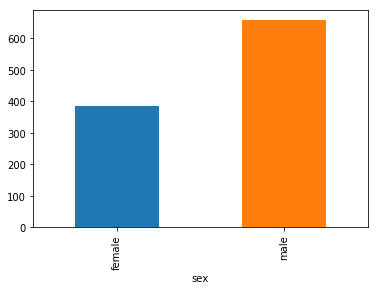

In [22]:
train_data[['sex','survived']].groupby('sex').survived.count().plot(kind='bar')

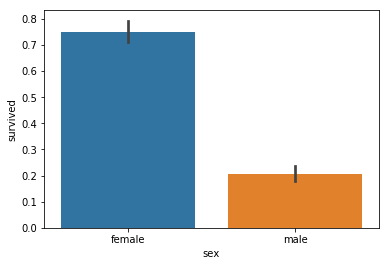

In [82]:
# Females are the one survived more upto 75% :
sns.barplot(x='sex', y='survived', data=train_data)

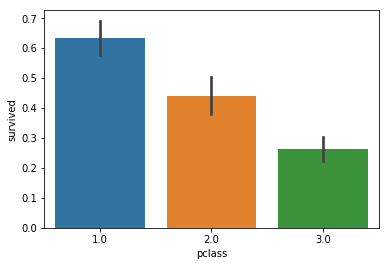

In [83]:
# Higher the class, higher the chance of survival :

sns.barplot(x='pclass', y='survived', data=train_data)

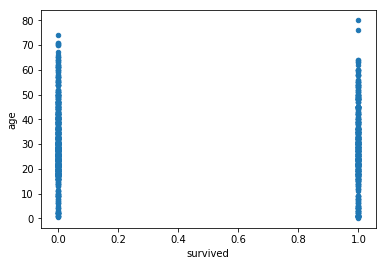

In [84]:
train_data.plot.scatter('survived','age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002EB0E03898>]],
      dtype=object)

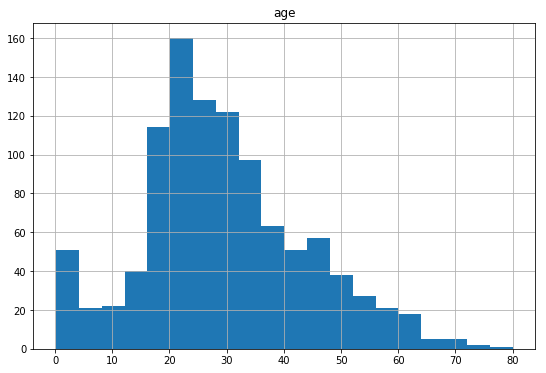

In [85]:
train_data.hist(column='age',    # Colomn to plot
                figsize=(9,6),   # Plot size
                bins=20)         # Number of histogram bins

C:\Users\julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


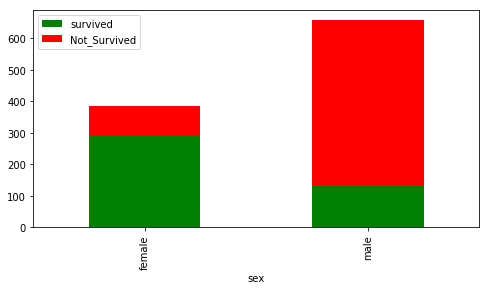

In [45]:
#Let's visualize survival based on the gender.
# agg('sum')[['survived', 'Not_Survived']] wil give count of survived and not survived by simply counting entire coloumn.

survi_data=train_data[['sex','age','survived']]
survi_data['Not_Survived'] = 1 - survi_data['survived']
survi_data.groupby('sex').agg('sum')[['survived', 'Not_Survived']].plot(kind='bar', figsize=(8, 4),
                                                                        stacked=True, color=['g', 'r']);

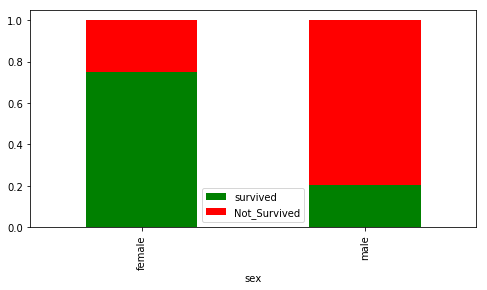

In [46]:
#Let's plot the same graph but with ratio instead.

survi_data.groupby('sex').agg('mean')[['survived', 'Not_Survived']].plot(kind='bar', figsize=(8, 4), 
                                                           stacked=True, color=['g', 'r']);

In [47]:
# Conclusion from above data :
#The Sex variable seems to be a discriminative feature. Women are more likely to survive.

survi_data.head(3)

,sex,age,survived,Not_Survived
0,female,29.0000,1.0,0.0
1,male,0.9167,1.0,0.0
2,female,2.0000,0.0,1.0


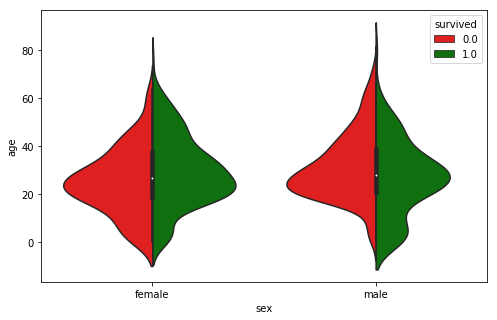

In [38]:
#Let's now correlate the survival with the age variable.

fig = plt.figure(figsize=(8, 5))
sns.violinplot(x='sex', y='age', 
               hue='survived', data=train_data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

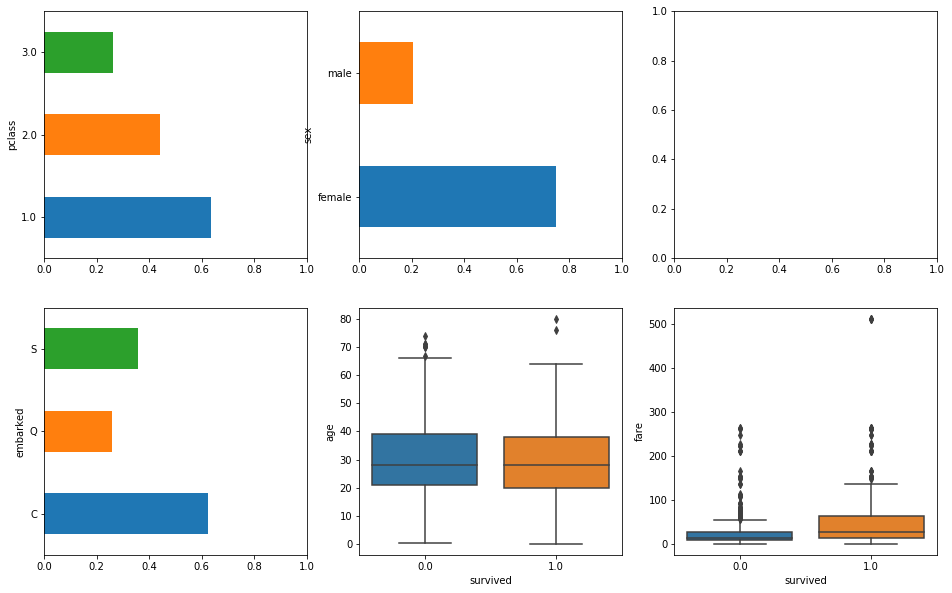

In [35]:
figbi, axesbi = plt.subplots(2, 3, figsize=(16, 10))
train_data.groupby('pclass')['survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train_data.groupby('sex')['survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train_data.groupby('embarked')['survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="survived", y="age", data=train_data,ax=axesbi[1, 1])
sns.boxplot(x="survived", y="fare", data=train_data,ax=axesbi[1,2])

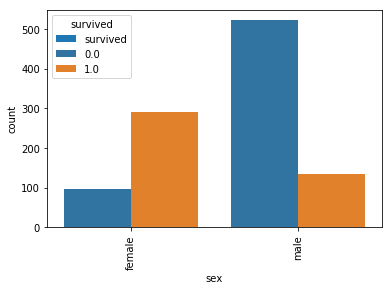

In [30]:

train_data[['sex','survived']].groupby(['sex']).mean().plot.bar()
sns.countplot('sex',hue='survived',data=train_data,)
plt.show()

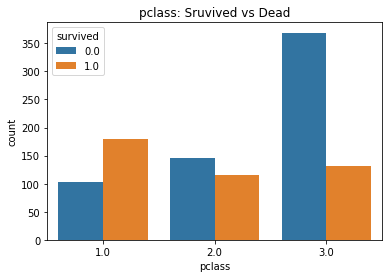

In [31]:
sns.countplot('pclass', hue='survived', data=train_data)
plt.title('pclass: Sruvived vs Dead')
plt.show()

In [ ]:
# Stats from the above data analysis for 'gender','survived' :

# The age conditions the survival for male passengers:
# Younger male tend to survive
# A large number of passengers between 20 and 40 died
# The age doesn't seem to have a direct impact on the female survival
# These violin plots confirm that one old code of conduct that sailors and captains 
# follow in case of threatening situations: "Women and children first !".

In [51]:
#Let's now focus on the Fare ticket of each passenger and see how it could impact the survival:

train_data[['fare','survived']].groupby(['fare','survived']).survived.count()

fare      survived
0.0000    0.0          6
          1.0          2
3.1708    1.0          1
4.0125    0.0          1
5.0000    0.0          1
6.2375    0.0          1
6.4375    0.0          1
6.4500    0.0          1
6.4958    0.0          3
6.7500    0.0          2
6.9500    1.0          1
6.9750    0.0          1
          1.0          1
7.0000    1.0          1
7.0458    0.0          1
7.0500    0.0          7
7.0542    0.0          2
7.1250    0.0          4
7.1417    1.0          1
7.2250    0.0          9
          1.0          4
7.2292    0.0          8
          1.0          5
7.2500    0.0         13
          1.0          1
7.2833    0.0          1
7.4958    0.0          2
          1.0          1
7.5208    0.0          1
7.5500    0.0          1
                      ..
113.2750  1.0          2
120.0000  1.0          4
133.6500  1.0          1
134.5000  1.0          5
135.6333  0.0          1
          1.0          3
136.7792  0.0          1
          1.0          1
146.52

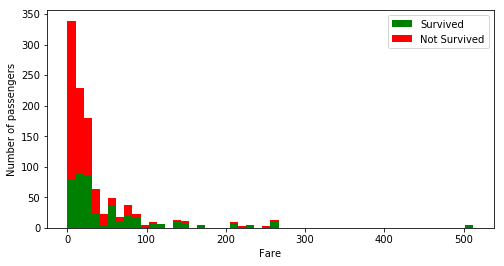

In [55]:
figure = plt.figure(figsize=(8, 4))
plt.hist([train_data[train_data['survived'] == 1]['fare'], train_data[train_data['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Not Survived'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

# Bins : A data point is included in a particular bin if the number is greater than the lowest bound and equal to or less than 
# the greatest bound for the data bin. It is a range of set of data points

In [ ]:
# Stats from the above Data Analysis for 'fare','survived' :

# passengers with more expensive tickets are survived.
# Higher the ticket price, higher the chance of survival.

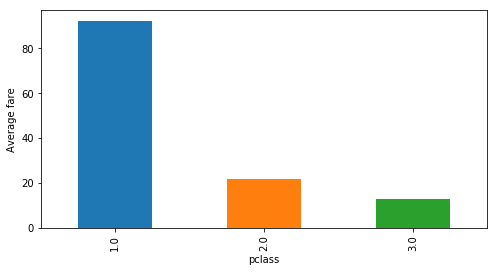

In [62]:
# As a matter of fact, the ticket fare correlates with the class as we see it in the chart below.

ax = plt.subplot()
ax.set_ylabel('Average fare')
train_data.groupby('pclass').mean()['fare'].plot(kind='bar', figsize=(8, 4), ax = ax);

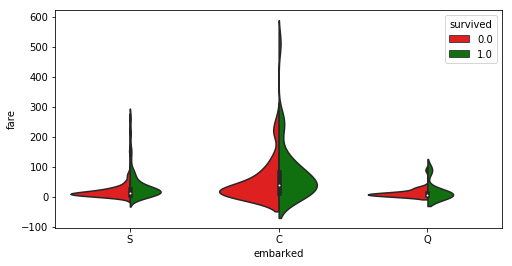

In [63]:
#Let's now see how the embarkation site affects the survival.

fig = plt.figure(figsize=(8, 4))
sns.violinplot(x='embarked', y='fare', hue='survived', data=train_data, split=True, palette={0: "r", 1: "g"});

In [ ]:
#It seems that the embarkation C have a wider range of fare tickets 
# and therefore the passengers who pay the highest prices are those who survive.

In [88]:
train_data.head()

,pclass,age,sex,embarked,survived,fare
0,1.0,29.0000,female,S,1.0,211.3375
1,1.0,0.9167,male,S,1.0,151.5500
2,1.0,2.0000,female,S,0.0,151.5500
3,1.0,30.0000,male,S,0.0,151.5500
4,1.0,25.0000,female,S,0.0,151.5500


In [ ]:
# Counting who are survived in the Titanic crash based on thier age:

survive = train_data[train_data["survived"] == 'Survived']
not_survived = train_data[train_data["survived"] == 'Not Survived']

survive["age"].plot.hist(alpha=0.5,color='red',bins=50)
not_survived["age"].plot.hist(alpha=0.5,color='blue',bins=50)

plt.legend(['Survived','Not Survived'])
plt.xlabel("Age Group of Passengers")
plt.ylabel("Count of Survived and Not Survived")
plt.show()

In [ ]:
survived["pclass"].plot.hist(alpha=0.5,color='red',bins=50)
not_survived["pclass"].plot.hist(alpha=0.5,color='blue',bins=50)

plt.legend(['Survived','Not Survived'])
plt.xlabel("pclass 1 2 3 Passengers")
plt.ylabel("Count of Survived and Not Survived")
plt.show()

In [74]:
train_data['sex'].describe()

count     1043
unique       2
top       male
freq       657
Name: sex, dtype: object

In [107]:
pclass_data=train_data[['pclass']]
pclass_data.pclass[pclass_data.pclass==1]='P class 1'
pclass_data.pclass[pclass_data.pclass==2]='P class 2'
pclass_data.pclass[pclass_data.pclass==3]='P class 3'

print(pclass_data.head(3))
pclass_data['pclass'].describe()

C:\Users\julian\Anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\julian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users

      pclass
0  P class 1
1  P class 1
2  P class 1


count          1043
unique            3
top       P class 3
freq            500
Name: pclass, dtype: object

In [96]:
new_survived = pd.Categorical(train_data["survived"])
new_survived = new_survived.rename_categories(["Not Survived","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Not Survived,618,0.592522
Survived,425,0.407478


In [112]:
new_Pclass = pd.Categorical(train_data["pclass"],ordered=True)
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     
new_Pclass.describe()

,counts,freqs
categories,,
Class1,282,0.270374
Class2,261,0.250240
Class3,500,0.479386


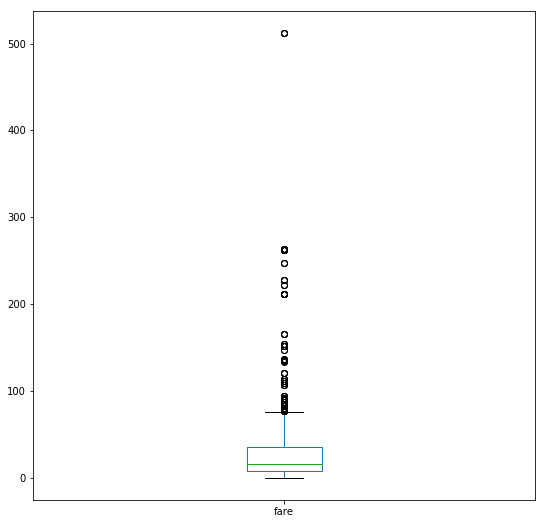

In [124]:
train_data["fare"].plot(kind="box",figsize=(9,9))

In [127]:
# Let's check who paid Highest fare for titanic :
index = np.where(tit_data["fare"] == max(tit_data["fare"]) )
tit_data.loc[index]

# Fortunately all these four were survived in Titanic Crash

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1.0,1.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1.0,1.0,"Lesurer, Mr. Gustave J",male,35.0,0.0,0.0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1.0,1.0,"Ward, Miss. Anna",female,35.0,0.0,0.0,PC 17755,512.3292,NaN,C,3,NaN,NaN


In [129]:
tit_data["Family"] = tit_data["sibsp"] + tit_data["parch"]

most_family = np.where(tit_data["Family"] == max(tit_data["Family"]))

tit_data.ix[most_family]

C:\Users\julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family
1170,3.0,0.0,"Sage, Master. Thomas Henry",male,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1171,3.0,0.0,"Sage, Master. William Henry",male,14.5,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,10.0
1172,3.0,0.0,"Sage, Miss. Ada",female,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1173,3.0,0.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1174,3.0,0.0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1175,3.0,0.0,"Sage, Miss. Stella Anna",female,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1176,3.0,0.0,"Sage, Mr. Douglas Bullen",male,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1177,3.0,0.0,"Sage, Mr. Frederick",male,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1178,3.0,0.0,"Sage, Mr. George John Jr",male,NaN,8.0,2.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0
1179,3.0,0.0,"Sage, Mr. John George",male,NaN,1.0,9.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10.0


In [92]:
# Taking a look at some survival rates for babies
youngest_to_survive = train_data[train_data['survived'] == True]['age'].min()
youngest_to_die = train_data[train_data['survived'] == False]['age'].min()
oldest_to_survive = train_data[train_data['survived'] == True]['age'].max()
oldest_to_die = train_data[train_data['survived'] == False]['age'].max()

print('Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die))


Youngest to survive: 0.1667 
Youngest to die: 0.3333 
Oldest to survive: 80.0 
Oldest to die: 74.0


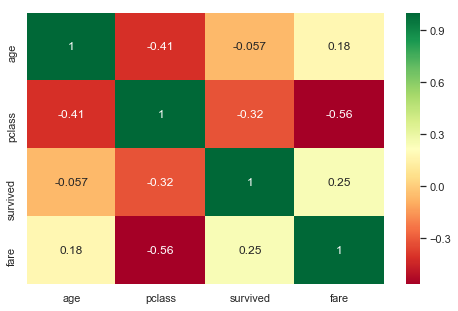

In [13]:
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
Selected_features = ['age',  'pclass','embarked','sex','survived','fare']
X = train_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [9]:
# Preparing data for testing with alogoritm models :

# pass the same seed for to get same data sets to train set and test set :
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set= split_train_test(train_data, 0.2)
print("size of train_set :",len(train_set))
print("size of test_set :",len(test_set))

size of train_set : 835
size of test_set : 208


In [13]:
print(train_set.head(5))
print(test_set.head(5))

      pclass   age     sex embarked  survived     fare
568      2.0  18.5    male        S       0.0   13.000
250      1.0  18.0  female        C       1.0  262.375
1211     3.0  45.0  female        S       0.0   27.900
616      3.0  24.0    male        S       0.0    7.050
532      2.0  41.0    male        S       0.0   13.000
      pclass   age   sex embarked  survived   fare
240      1.0  45.0  male        S       1.0  26.55
51       1.0  33.0  male        S       0.0   5.00
831      3.0  40.0  male        S       0.0  46.90
1051     3.0  33.0  male        S       0.0   8.05
30       1.0  45.0  male        S       0.0  35.50


In [18]:
# Implimentation :

import hashlib

def test_set_check(identifier, test_ratio, hash):
     return hash(np.int64(identifier)).digest()[-1]<259*test_ratio
    
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
titanic_data_id=train_data.reset_index()
train_set, test_set = split_train_test_by_id(titanic_data_id, 0.2, "index")
print("size of train_set :",len(train_set))
print("size of test_set :",len(test_set))

size of train_set : 844
size of test_set : 199


In [20]:
print(train_set.head(5))
print(test_set.head(5))

   index  pclass      age     sex embarked  survived      fare
0      0     1.0  29.0000  female        S       1.0  211.3375
1      1     1.0   0.9167    male        S       1.0  151.5500
2      2     1.0   2.0000  female        S       0.0  151.5500
3      3     1.0  30.0000    male        S       0.0  151.5500
6      6     1.0  63.0000  female        S       1.0   77.9583
    index  pclass   age     sex embarked  survived      fare
4       4     1.0  25.0  female        S       0.0  151.5500
5       5     1.0  48.0    male        S       1.0   26.5500
11     11     1.0  18.0  female        C       1.0  227.5250
19     20     1.0  37.0    male        S       1.0   52.5542
22     23     1.0  42.0  female        C       1.0  227.5250


In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)
print("size of train_set :",len(train_set))
print("size of test_set :",len(test_set))

size of train_set : 834
size of test_set : 209


In [23]:
print(train_set.head(5))
print(test_set.head(5))

      pclass   age     sex embarked  survived      fare
601      3.0  13.0    male        S       0.0   20.2500
294      1.0  49.0    male        C       0.0  110.8833
394      2.0  18.0    male        S       0.0   73.5000
65       1.0  33.0  female        S       1.0   53.1000
1125     3.0  24.0    male        S       0.0    8.0500
      pclass      age     sex embarked  survived    fare
1298     3.0  36.0000    male        S       0.0   9.500
321      1.0  62.0000    male        S       0.0  26.550
590      2.0   0.9167  female        S       1.0  27.750
935      3.0  29.0000    male        S       1.0  22.025
704      3.0  21.0000    male        S       0.0   8.050


In [12]:
# Data Conversion Categorical to Numerical :


train_data.sex[train_data.sex=='female']=0
train_data.sex[train_data.sex=='male']=1
train_data.embarked[train_data.embarked=='C']=1
train_data.embarked[train_data.embarked=='S']=2
train_data.embarked[train_data.embarked=='Q']=3

C:\Users\julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\julian\Anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\julian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users

In [13]:
from sklearn import model_selection

X = train_data[['pclass','age','sex','embarked']]
Y = train_data[['survived']]

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfor = RandomForestClassifier()
rfor.fit(X,Y)

P = [[2,28,0,1]]
print(rfor.predict(P))

rfor.fit(X_train,Y_train)
#print(round(rfor.score(X_train,Y_train), 4)*100)

# predicting the test set results
Y_pred=rfor.predict(X_test)
#print(y_pred)

print(rfor.score(X_test,Y_test)*100)
print(accuracy_score(Y_test,Y_pred)*100)

C:\Users\julian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[1.]
78.59424920127796
78.59424920127796


In [16]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

#predictions = logmodel.predict(X_test)
#predictions

P = [[2,28,0,1]]
print(logmodel.predict(P))
#print(round(logmodel.score(X_train,Y_train), 4)*100)

Y_pred=logmodel.predict(X_test)
#print(y_pred)
print(logmodel.score(X_test,Y_test)*100)
print(accuracy_score(Y_test,Y_pred)*100)

[1.]
79.2332268370607
79.2332268370607


C:\Users\julian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\julian\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,Y_train)

P = [[2,28,0,1]]
print(clf.predict(P))
#print(round(clf.score(X_train,Y_train), 4)*100)

Y_pred=clf.predict(X_test)

#print(y_pred)
print(clf.score(X_test,Y_test)*100)
print(accuracy_score(Y_test,Y_pred)*100)

[1.]
78.27476038338658
78.27476038338658


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc

## Predict y given validation set
clfpredictions = clf.predict(X_test)
rforpredictions = rfor.predict(X_test)
logregpredictions = logmodel.predict(X_test)

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
#confusion_matrix(Y_test,clfpredictions)
#confusion_matrix(Y_test,rforpredictions)
#confusion_matrix(Y_test,logregpredictions)

## Precision
print("DecisionTreeCLassification Precision: %0.4f" % precision_score(Y_test, clfpredictions))
print("RandomForestClassifier Precision: %0.4f" % precision_score(Y_test, rforpredictions))
print("LogisticRegression Precision: %0.4f" % precision_score(Y_test, logregpredictions))

print("---------------------------------------------------")

## Recall score
print("DecisionTreeCLassification Recall: %0.4f" % recall_score(Y_test, clfpredictions))
print("RandomForestClassifier Recall: %0.4f" % recall_score(Y_test, rforpredictions))
print("LogisticRegression Recall: %0.4f" % recall_score(Y_test, logregpredictions))

print("---------------------------------------------------")


# We can check precision,recall,f1-score using classification report!
## Print classification report
print(classification_report(Y_test, clfpredictions))
print(classification_report(Y_test, rforpredictions))
print(classification_report(Y_test, logregpredictions))

DecisionTreeCLassification Precision: 0.7810
RandomForestClassifier Precision: 0.7381
LogisticRegression Precision: 0.7870
---------------------------------------------------
DecisionTreeCLassification Recall: 0.6457
RandomForestClassifier Recall: 0.7323
LogisticRegression Recall: 0.6693
---------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       186
         1.0       0.78      0.65      0.71       127

   micro avg       0.78      0.78      0.78       313
   macro avg       0.78      0.76      0.77       313
weighted avg       0.78      0.78      0.78       313

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       186
         1.0       0.74      0.73      0.74       127

   micro avg       0.79      0.79      0.79       313
   macro avg       0.78      0.78      0.78       313
weighted avg       0.79      0.79      0.79       313

     

ROC Curve for DecisionTreeClassifier


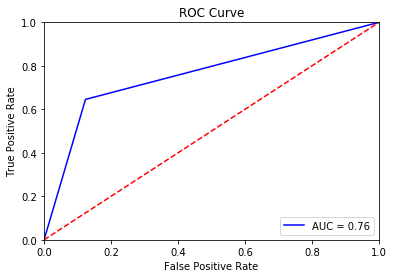

In [24]:
## Get data to plot ROC Curve
print("ROC Curve for DecisionTreeClassifier")
fp, tp, th = roc_curve(Y_test, clfpredictions)
roc_auc = auc(fp, tp)


# In[54]:

## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for RandomForestClassifier


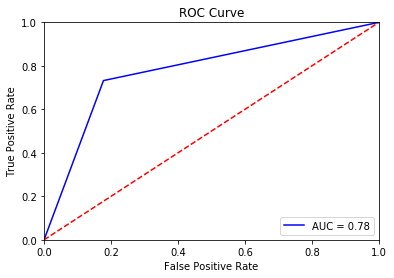

In [25]:
## Get data to plot ROC Curve
print("ROC Curve for RandomForestClassifier")
fp, tp, th = roc_curve(Y_test, rforpredictions)
roc_auc = auc(fp, tp)


# In[54]:

## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for LogisticRegression


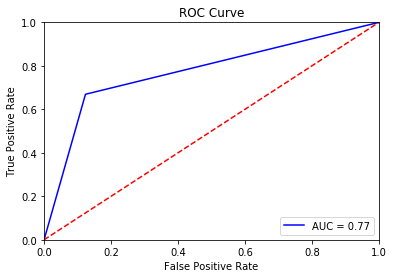

In [26]:
## Get data to plot ROC Curve
print("ROC Curve for LogisticRegression")
fp, tp, th = roc_curve(Y_test, logregpredictions)
roc_auc = auc(fp, tp)


# In[54]:

## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
# We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.83       186
         1.0       0.79      0.67      0.72       127

   micro avg       0.79      0.79      0.79       313
   macro avg       0.79      0.77      0.78       313
weighted avg       0.79      0.79      0.79       313



In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.ensemble import RandomForestClassifier

X = train_data[['pclass','age','sex','embarked']]
Y = train_data[['survived']]

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=0)

rfor = RandomForestClassifier()
#train data
rfor.fit(X_train, Y_train)

P = pd.DataFrame([[2,22,0,1]])
print(rfor.predict(P))

#R-SQUARED AND ADJUSTED R-SQUARED COEFFICIENTS
#model1=sm.OLS(X_train,Y_train)
#result=model1.fit()
#print(result.summary())